## Machine Learning Assignment

*instructions*

Using one of the three datasets to demonstrate k-means clustering using the scikit learn package (50 points). Be sure to review the readings before you start on this assignment. 
1. Calculate the sum of least square error for each different values of 'k'
2. Using Matplotlib determine the optimal number of clusters (k) using the elbow method along with a brief explanation (50 points)
3. Finally plot the optimal clusters with their centroids along with a brief explanation (50 points). Comment your code as needed

In [55]:
# import necessary packages #
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Import the arrhythmia data #
arr_data = pd.read_csv("arrhythmia.data", header = None, delimiter=",")
arr_data = arr_data.iloc[:, 0:4]
arr_data.columns = ["age", "sex", "height", "weight"]
arr_data = arr_data.dropna()
arr_data.head()

,age,sex,height,weight
0,75,0,190,80
1,56,1,165,64
2,54,0,172,95
3,55,0,175,94
4,75,0,190,80


In [70]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Split the data into training and testing sets
train_one, test_one, train_two, test_two = train_test_split(arr_data[['age', 'weight']], arr_data[['height']], test_size=0.33, random_state=0)

# Normalize the training and testing data
#train_one_norm = preprocessing.normalize(train_one)
#test_one_norm = preprocessing.normalize(test_one)

In [71]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

K = range(2, 10)
fits = []
sse_score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init=10).fit(train_one)
    sse = model.inertia_
    sse_score.append(sse)
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    #score.append(silhouette_score(train_one_norm, model.labels_, metric='euclidean'))

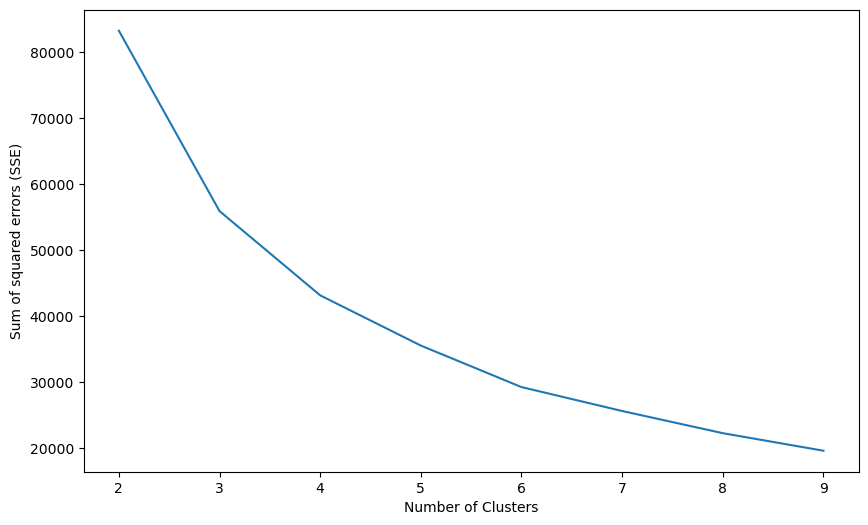

In [78]:
plt.figure(figsize=(10, 6))
# plotting the k cluster number vs the sum of squared errors value
sns.lineplot(x = K, y = sse_score)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared errors (SSE)')
plt.show()

## Determining the optimal number of clusters using the elbow method

The elbow method, as shown above, is a method for unsupervised model training which aids in the selection of the optimal number of clusters for the data. In this plot the sum of squared errors is plotted vs the number of clusters generated. The sum of squared errors is a way to represent the distance of the datapoints from the centroid point that is chosen to represent the cluster. The optimal number of clusters is chosen by identifying the number of clusters where the sum of squared errors starts to level out and become linear. In this example, I have chosen 4 as my optimal number of clusters.

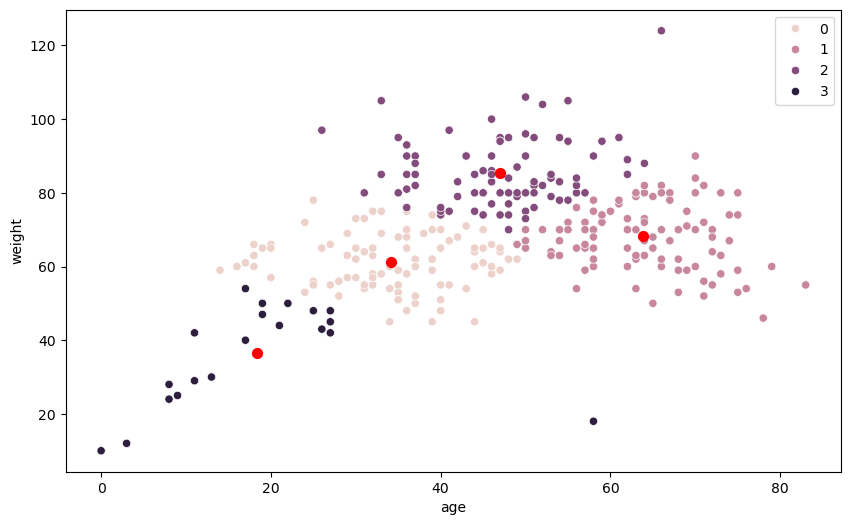

In [77]:
plt.figure(figsize=(10, 6))
# extract centroid values #
centroids = fits[2].cluster_centers_
# Plot the data
sns.scatterplot(data = train_one, x = 'age', y = 'weight', hue = fits[2].labels_)
# plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

### Final Plot ###
The above plot is the age and weight data divided into 4 clusters as determined by the elbow method. Additionally, the centroid points for each cluster has been indicated by a red dot. This is the defining point that is used to represent each cluster as determined by the model.